In [1]:
# Step 2: Data Cleaning + EDA + KPI Extraction

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (update path if needed)
df = pd.read_csv(R'C:\Users\adder\Downloads\Ai DATA\Sample - Superstore.csv', encoding='latin1')

# -------------------------------
# 🔹 Basic Cleaning
# -------------------------------
# Fix column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert date columns
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
print("Missing values:\n", df.isnull().sum())
df = df.dropna(subset=['Sales', 'Profit'])   # Drop rows missing key metrics

# -------------------------------
# 🔹 KPI Extraction
# -------------------------------
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_order_value = df.groupby('Order_ID')['Sales'].sum().mean()
top_region = df.groupby('Region')['Sales'].sum().idxmax()
top_product = df.groupby('Sub-Category')['Sales'].sum().idxmax()

kpi_summary = {
    "Total Sales": round(total_sales, 2),
    "Total Profit": round(total_profit, 2),
    "Average Order Value": round(avg_order_value, 2),
    "Top Region by Sales": top_region,
    "Top Product Category": top_product
}

print("\n📊 KPI Summary:")
for k, v in kpi_summary.items():
    print(f"{k}: {v}")

# -------------------------------
# 🔹 Quick EDA Visualizations
# -------------------------------
# Sales by Region
plt.figure(figsize=(7,4))
sns.barplot(x="Region", y="Sales", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Region")
plt.show()

# Profit by Category
plt.figure(figsize=(7,4))
sns.barplot(x="Category", y="Profit", data=df, estimator=sum, ci=None)
plt.title("Total Profit by Category")
plt.show()

# Monthly Sales Trend
df['YearMonth'] = df['Order_Date'].dt.to_period('M')
sales_trend = df.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(10,4))
sales_trend.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


ModuleNotFoundError: No module named 'pandas'

In [13]:
pip install transformers torch


Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 4.2 MB/s eta 0:00:01
   ------------------------------------- -- 1.6/1.7 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/331.9 MB 5.6 MB/s eta 0:01:00
   ---------------------------------------- 2.4/331.9 MB 6.1 MB/s eta 0:00:55
   ---------------------------------------- 3.7/331.9 MB 6.4 MB/s eta 0:00:52
    --------------------------------------- 5.5/331.9 MB 6.8 MB/s eta 0:00:48
    --------------------------------------- 7.3/331.9 MB 7.2 MB/s eta 0:00:46
   - -------------------------------------- 8.9/331.9 MB 7.5 MB/s eta 0:00:44
   - -------------------------------------- 10.7/331.9 MB 7.5 MB/s eta 0:00:43
   - -------------------------------------- 12.3/331.9 MB 7.6 MB/s eta 0:00:42
   - -

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.3 which is incompatible.
tensorflow-intel 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.32.1 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.20.0 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.1 which is incompatible.


In [16]:
from transformers import pipeline

# Load a small, free model (you can change to bigger ones if your system allows)
generator = pipeline("text-generation", model="gpt2")

# Example prompt (instead of sending to OpenAI API)
prompt = "Analyze the sentiment of this review: The product was amazing and delivery was fast."

# Generate response
response = generator(prompt, max_length=100, num_return_sequences=1)

print("\n🤖 AI-Generated Insights:\n")
print(response[0]['generated_text'])


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=100) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



🤖 AI-Generated Insights:

Analyze the sentiment of this review: The product was amazing and delivery was fast. I ordered 4 of the 6. My wife took the time to read the reviews and had a great experience with the product. If you only want to buy this product with a few cents on the dollar, buy this product.

Reviewed By Date Rating Strength Flavoring Taste Room Note Emeritus Account (28392) 2011-06-02 Medium to Strong None Detected Medium Pleasant to Tolerable I've smoked many blends of this tobacco, and I've often found that it is the best blend I've ever smoked. It smokes really well, and burns evenly and evenly. It is a bit bitter, with a pleasant taste. I don't find it to be a very flavorful tobacco, but it does give me a headache. Pipe Used: Briar Age When Smoked: 1 year Purchased From: smokingpipes.com Similar Blends: Mixture 1 (Smoked by a friend of mine). Nobody has rated this review yet.

Reviewed By Date Rating Strength Flavoring Taste Room Note Emeritus Account (28392) 2011-0

In [22]:
import pandas as pd

# Use encoding to fix Unicode error
df = pd.read_csv(r"C:\Users\adder\Downloads\Ai DATA\Sample - Superstore.csv", encoding="cp1252")

print("📊 Dataset Loaded Successfully!")
print(df.head())


📊 Dataset Loaded Successfully!
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-C

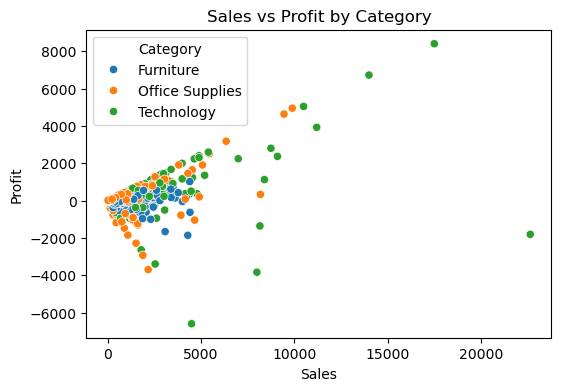

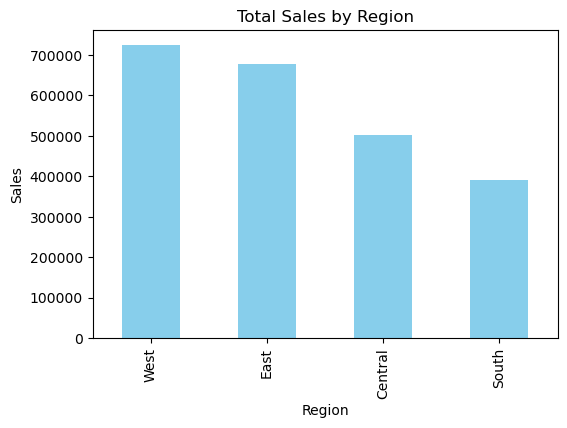

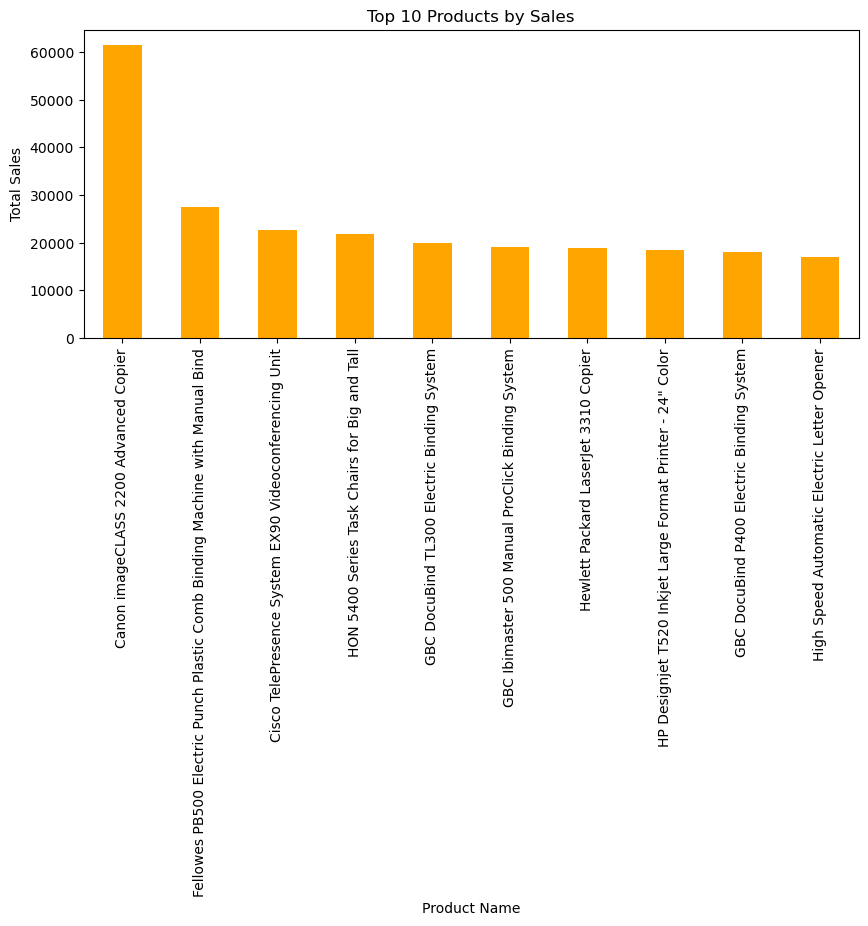

C:\Users\adder\AppData\Local\Temp\ipykernel_25644\3551333179.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Sales", data=df, estimator=sum, palette="viridis")


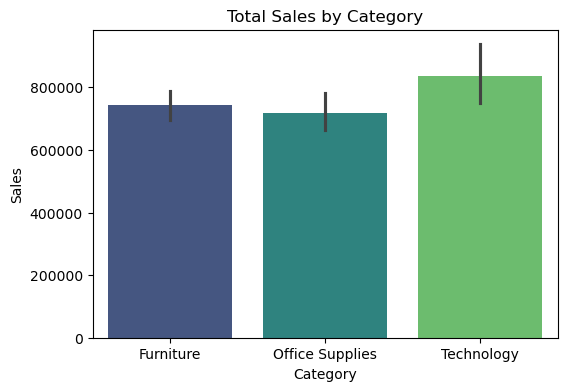

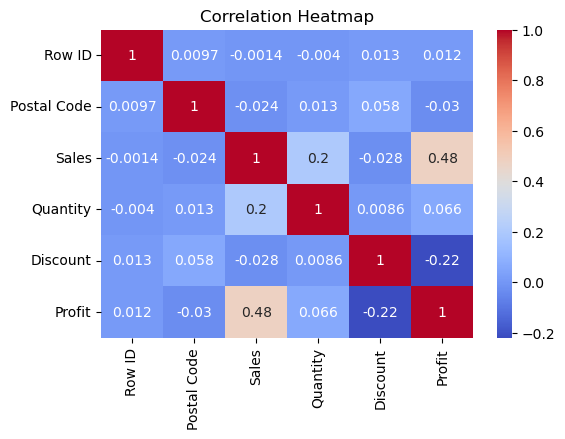

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset again just in case
df = pd.read_csv(r"C:\Users\adder\Downloads\Ai DATA\Sample - Superstore.csv", encoding="cp1252")

# 1. Sales vs Profit (scatter plot)
plt.figure(figsize=(6,4))
sns.scatterplot(x="Sales", y="Profit", data=df, hue="Category")
plt.title("Sales vs Profit by Category")
plt.show()

# 2. Sales by Region
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
region_sales.plot(kind="bar", figsize=(6,4), color="skyblue")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()

# 3. Top 10 Products by Sales
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", figsize=(10,4), color="orange")
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Sales")
plt.show()

# 4. Category-wise Sales
plt.figure(figsize=(6,4))
sns.barplot(x="Category", y="Sales", data=df, estimator=sum, palette="viridis")
plt.title("Total Sales by Category")
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


📊 Base Model Accuracy: 0.9474737368684342

Confusion Matrix:
 [[ 312   65]
 [  40 1582]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       377
           1       0.96      0.98      0.97      1622

    accuracy                           0.95      1999
   macro avg       0.92      0.90      0.91      1999
weighted avg       0.95      0.95      0.95      1999

Fitting 3 folds for each of 216 candidates, totalling 648 fits

📊 Optimized Model Accuracy: 0.943471735867934

Optimized Confusion Matrix:
 [[ 305   72]
 [  41 1581]]

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       377
           1       0.96      0.97      0.97      1622

    accuracy                           0.94      1999
   macro avg       0.92      0.89      0.90      1999
weighted avg       0.94      0.94      0.94      1999


Best Parameters: {'bootstrap'

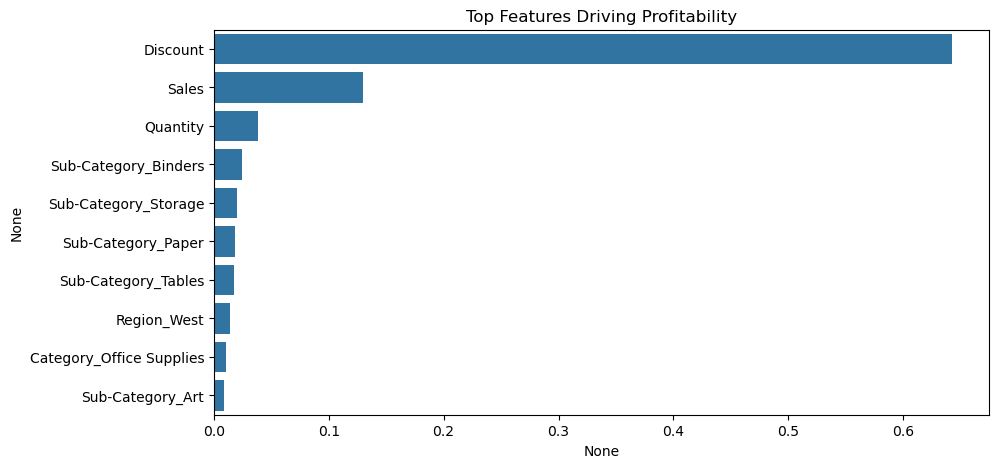

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\adder\Downloads\Ai DATA\Sample - Superstore.csv", encoding="cp1252")

# Target column: 1 = profitable, 0 = not profitable
df["Profitable"] = df["Profit"].apply(lambda x: 1 if x > 0 else 0)

# Features
features = ["Sales", "Quantity", "Discount", "Category", "Sub-Category", "Region", "Ship Mode"]
X = df[features]
y = df["Profitable"]

# One-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Base Random Forest
base_model = RandomForestClassifier(random_state=42, n_estimators=200)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

print("📊 Base Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)

# Best model from GridSearch
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n📊 Optimized Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nOptimized Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nBest Parameters:", grid_search.best_params_)

# Feature Importance
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top Features Driving Profitability")
plt.show()


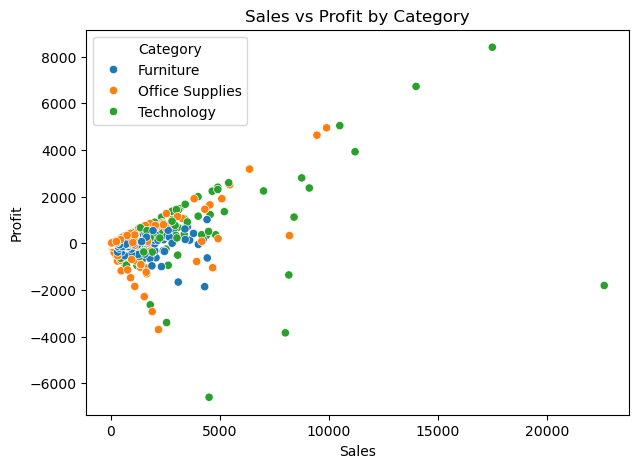

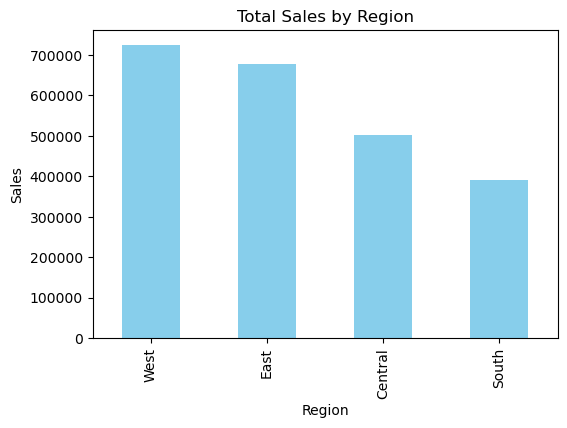

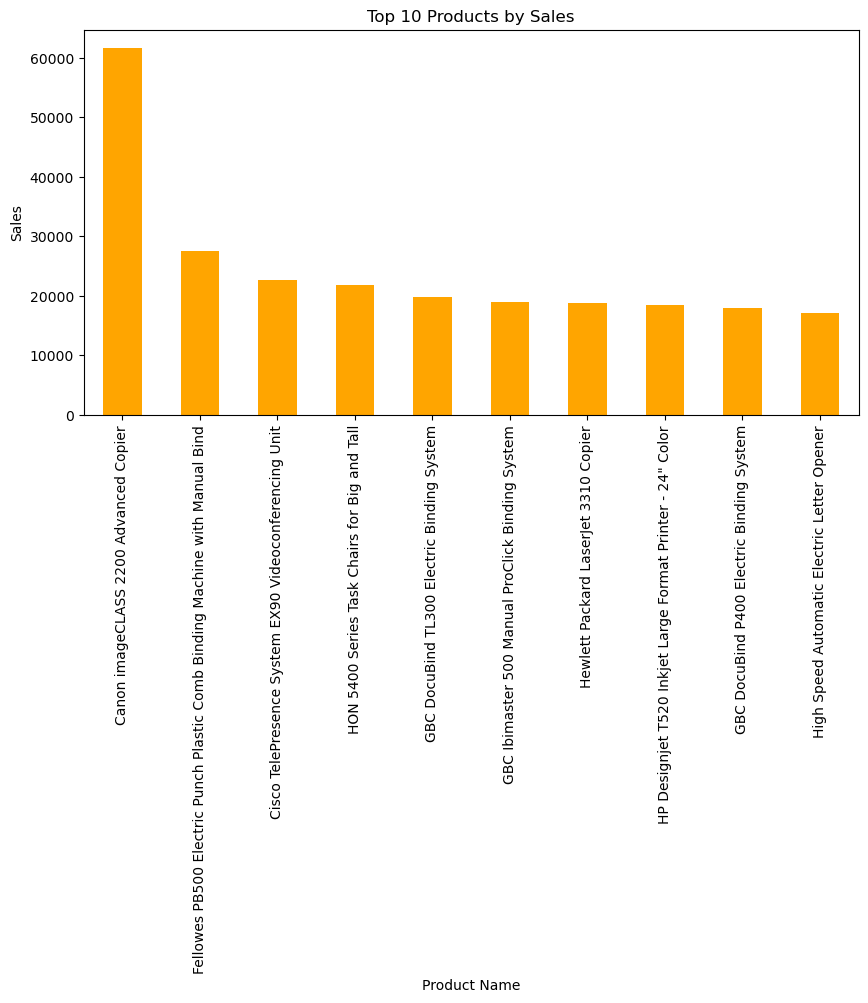

C:\Users\adder\AppData\Local\Temp\ipykernel_25644\1432549029.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Sales", data=df, estimator=sum, palette="viridis")


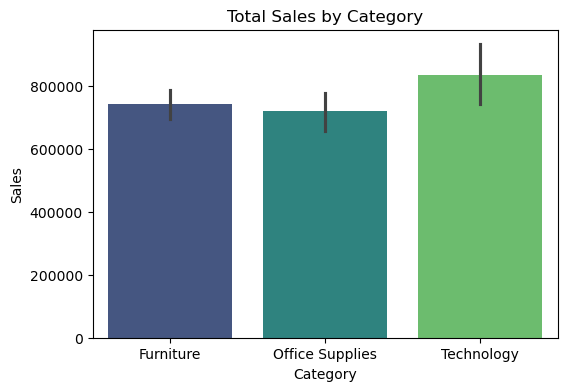

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales vs Profit by Category
plt.figure(figsize=(7,5))
sns.scatterplot(x="Sales", y="Profit", hue="Category", data=df)
plt.title("Sales vs Profit by Category")
plt.show()

# Total Sales by Region
plt.figure(figsize=(6,4))
df.groupby("Region")["Sales"].sum().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()

# Top 10 Products by Sales
plt.figure(figsize=(10,5))
df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Products by Sales")
plt.ylabel("Sales")
plt.show()

# Category-wise Sales
plt.figure(figsize=(6,4))
sns.barplot(x="Category", y="Sales", data=df, estimator=sum, palette="viridis")
plt.title("Total Sales by Category")
plt.show()
